In [152]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import pandas as pd

root = "/home/ki/projects/work/mchad/logs/multiruns/22-10:42:59/cifar10/"

dfs = []

values = {}

methods =  [ "mchad", "cac", "center"]

for method in methods:
    values[method] = []

    for i in range(21):
        path = f"{root}/{method}/{i}/results.csv"
        df = pd.read_csv(path)

        value = df["Distance/OOD/AUROC/test"].mean()
        values[method].append(value)

In [153]:
values = {k: np.array(v) for k, v in values.items()}

In [154]:
from collections import Counter
n_samples = 1
mc_iter = 10000

results = []

for n_samples in range(1, 22):
    winning = []

    for i in range(mc_iter):
        tmp = {}

        for method in methods:
            v = np.random.permutation(values[method])[:n_samples].mean()
            # print(v)
            tmp[method] = v

        # print(res)
        winning.append(max(tmp, key=tmp.get))

    c = Counter(winning)
    for method in methods:
        v = c[method]
        results.append({"Method": method, "Win Probability": v / mc_iter, "Number of Seed Replicates": n_samples})

In [155]:
data = pd.DataFrame(results)

In [156]:
name_map = {"cac": "CAC", "mchad": "MCHAD", "center": "Center", "gcac": "G-CAC", "gmchad": "G-MCHAD", "gcenter": "G-Center"}

data["Method"] = data["Method"].apply(name_map.get)

In [157]:
data


,Method,Win Probability,Number of Seed Replicates
0,MCHAD,0.5712,1
1,CAC,0.2929,1
2,Center,0.1359,1
3,MCHAD,0.6208,2
4,CAC,0.2789,2
...,...,...,...
58,CAC,0.0000,20
59,Center,0.0000,20
60,MCHAD,1.0000,21
61,CAC,0.0000,21


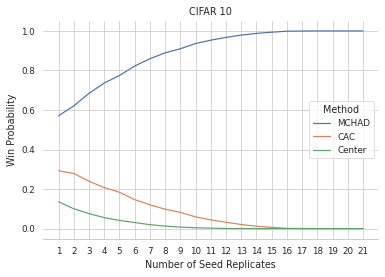

In [158]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
sb.set_style("whitegrid")
sb.set_context("paper")


g = sb.lineplot(data=data, x="Number of Seed Replicates", y="Win Probability", hue="Method")
sb.despine(top=True, left=True, right=True)
_ = g.set(xticks=range(1,22))
plt.title("CIFAR 10")
plt.savefig("out/trials.png", dpi=300)